# Analýza zákazníků

Máme k dispozici seznam zákazníků s jejich osobními informacemi a jejich chováním.

Na trh chceme uvést nový luxusní a drahý výrobek. 

Na které zákazníky máme zaměřit personalizovaný marketing?

# Úkol
- Proveďte základní analýzu dat a jejich vizualizaci
- Proveďte úpravu dat (encoding)
- Vyberte vhodné proměnné, podle kterých půjdou zákazníci segmentovat
- Vytvořte k-mean model s vhodným počtem segmentů
- Vizualizujte model
- Který segment je cílový?

# Načtení dat

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
data=pd.read_csv('..\\dataset\\Mall_Customers.csv')

# Popis  dat
- informace o datech
- náhled na data
- základní statistika
- zobrazení distribuce dat

# Příprava dat
- ošetření NaN hodnot
- encodování textových sloupců

# Výběr proměnných
- zobrazení vztahů mezi proměnnými (pairplot)
- hledáme kombinaci proměnných, které lze opticky ropzdělit do skupin
- vytvoření X pouze s těmito sloupci

# Zjištění parametru modelu k-mean
- vykreslení elbow grafu
- zjištění ideálního počtu clusterů

# k-mean model pro zjištěný počet clusterů
- natrénování modelu
- predikce dat

# Vizualizace modelu
- vykreslení obarvených skupin grafů

## Výklad modelu
- Popište jednotlivé skupiny
- Na jaké zákazníky se zaměřit?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

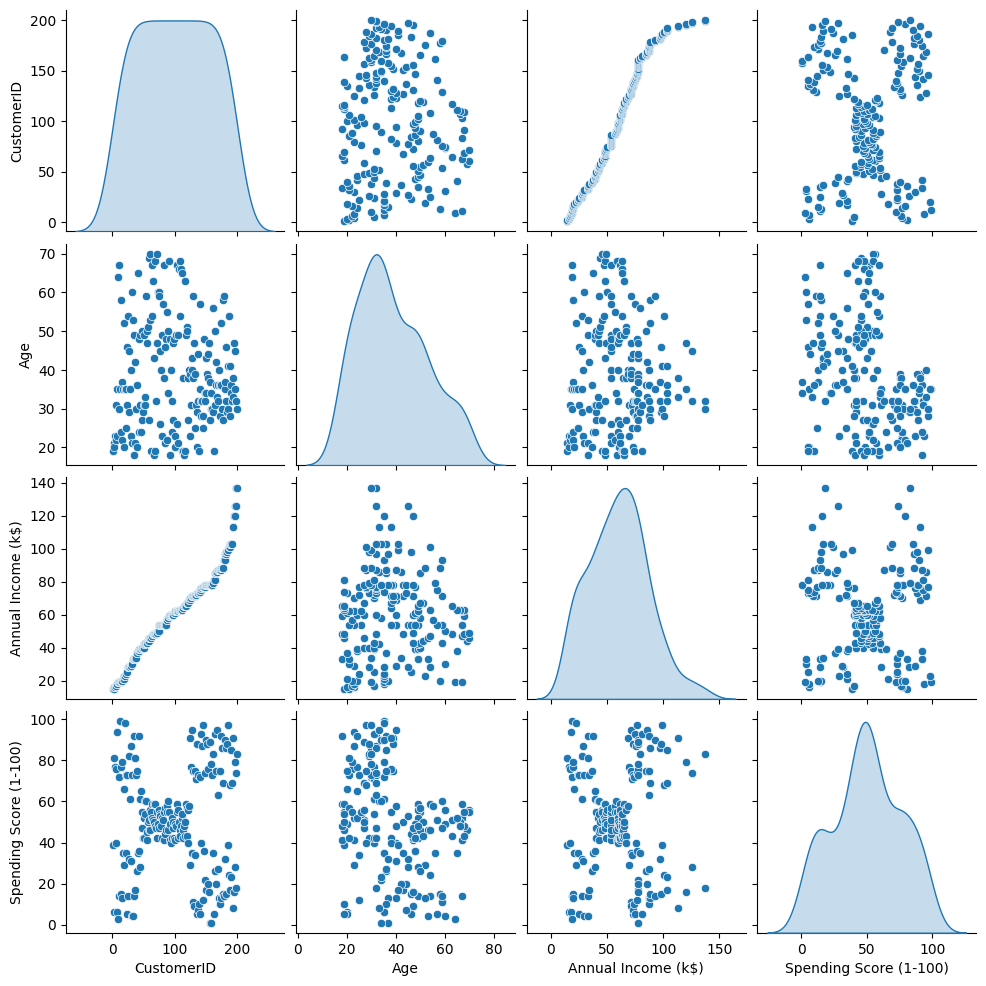

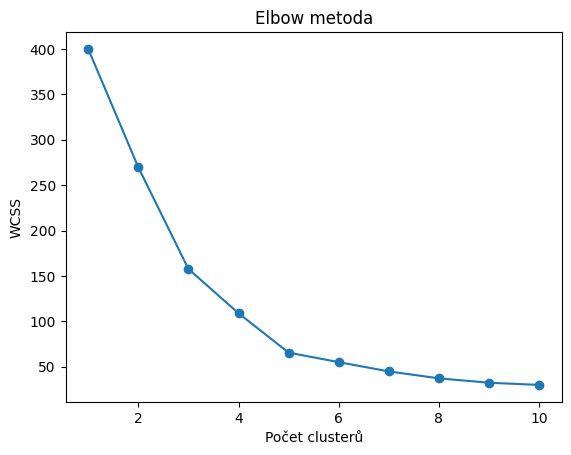

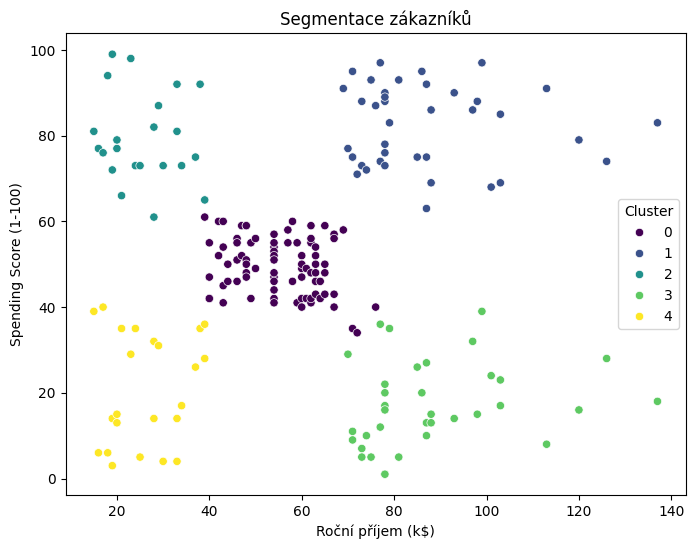

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [3]:
# Základní analýza
print(data.info())
print(data.describe())
print(data.head())

# Vizualizace distribuce dat
sns.pairplot(data, diag_kind='kde')
plt.show()

# Kontrola a odstranění NaN hodnot
data = data.dropna()

# Encoding textových hodnot
if 'Gender' in data.columns:
    le = LabelEncoder()
    data['Gender'] = le.fit_transform(data['Gender'])

# Výběr relevantních proměnných pro segmentaci
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Standardizace dat
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow metoda pro určení počtu clusterů
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Počet clusterů')
plt.ylabel('WCSS')
plt.title('Elbow metoda')
plt.show()

# Trénování K-Means modelu (zvolíme např. 5 clusterů podle Elbow metody)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Vizualizace výsledků
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.xlabel('Roční příjem (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Segmentace zákazníků')
plt.legend(title='Cluster')
plt.show()

# Výklad výsledků
print(data.groupby('Cluster')[features].mean())